In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [67]:
df = pd.read_csv(r"C:\Users\surya\Desktop\Jupyter Python Programs\Household Electric Power Consumption\clean_household_power_consumption.csv", parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, index_col='dt')

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.215,0.418,234.9,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.6,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.375,0.498,233.2,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.387,0.502,233.8,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.6,15.8,0.0,1.0,17.0


In [4]:
df.shape

(2075259, 7)

In [5]:
df = df.astype('float32')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
dtypes: float32(7)
memory usage: 71.2 MB


In [7]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091368e+00,1.237164e-01,2.435486e+02,4.630594e+00,1.121211e+00,1.298031e+00,6.454503e+00
std,1.050164e+00,1.121103e-01,4.206221e+00,4.412327e+00,6.065988e+00,5.722075e+00,8.405821e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.410000e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.429000e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112500e+01,1.390000e+00,2.541000e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### Checking skewness of columns

In [8]:
df.skew(axis=0, skipna=True)

Global_active_power      1.797508
Global_reactive_power    1.269893
Voltage                 -0.329094
Global_intensity         1.860765
Sub_metering_1           5.982102
Sub_metering_2           7.135353
Sub_metering_3           0.729274
dtype: float32

Global_active_power
1.7975062131881714


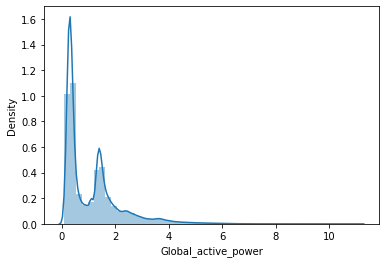

Global_reactive_power
1.2698922157287598


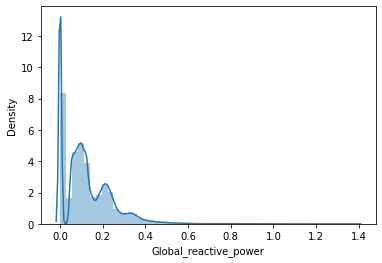

Voltage
-0.32918068766593933


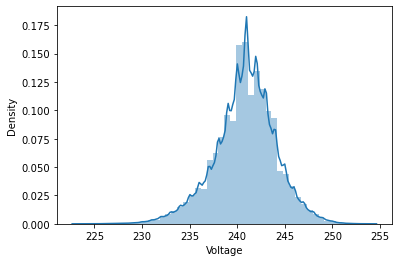

Global_intensity
1.8607630729675293


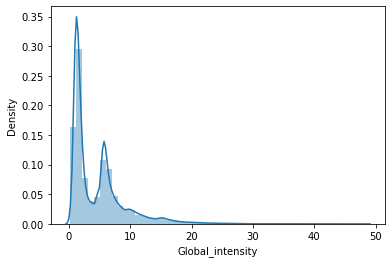

Sub_metering_1
5.982095241546631


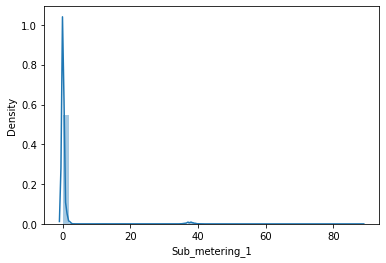

Sub_metering_2
7.135347366333008


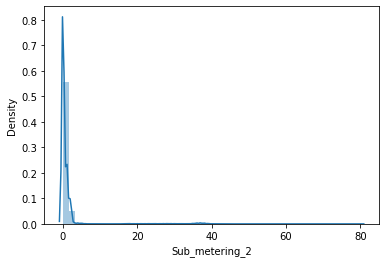

Sub_metering_3
0.7292738556861877


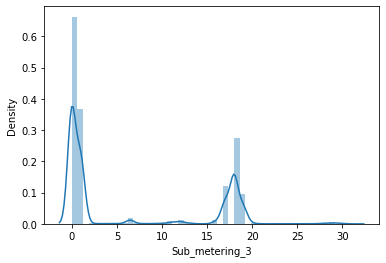

In [9]:
from scipy.stats import skew

# Reference to remove future warning (not applied here because things are not to scale while applying histplot)
# https://stackoverflow.com/questions/65973224/updating-seaborn-distplot-code-to-version-0-11

import warnings  
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

for col in df.columns:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

# Data Visualization

### Plotting all variables against datetime resampled by month

Global_active_power


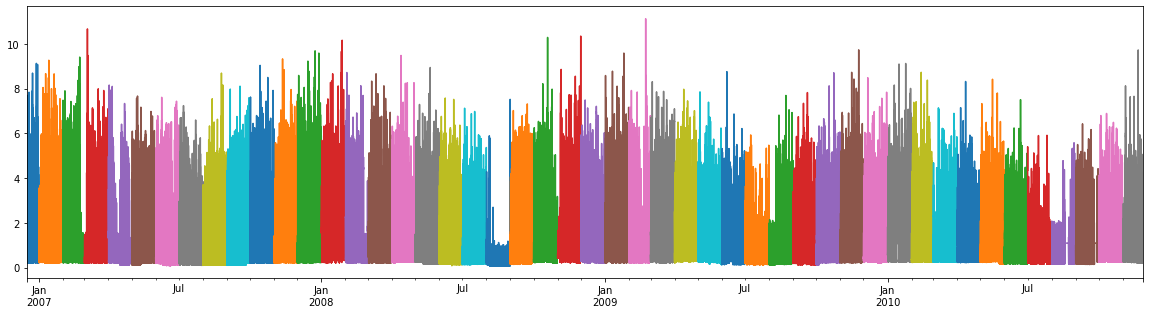

Global_reactive_power


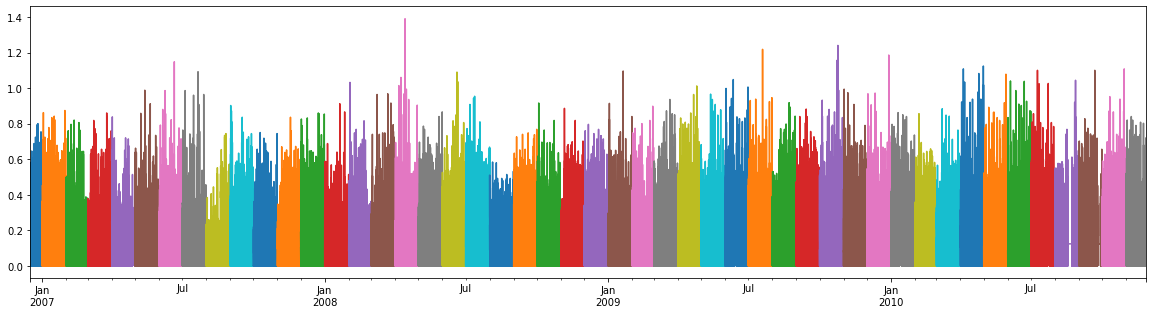

Voltage


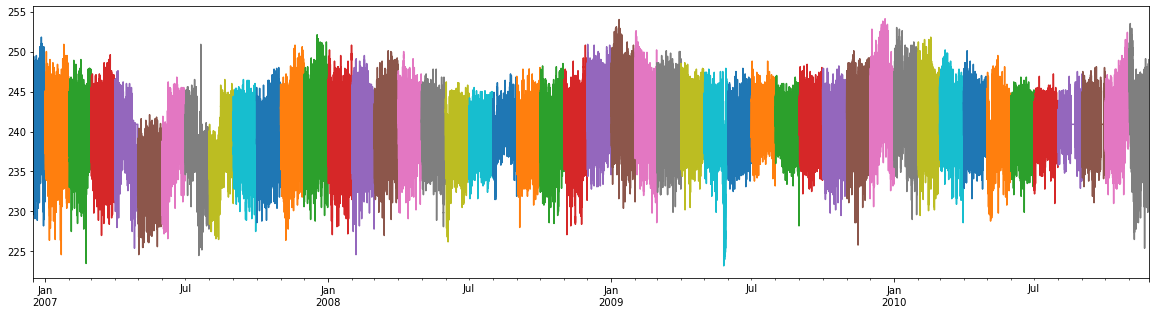

Global_intensity


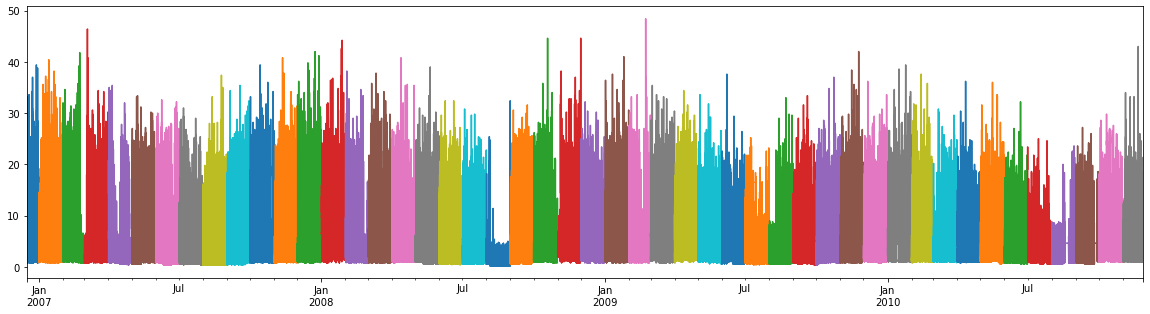

Sub_metering_1


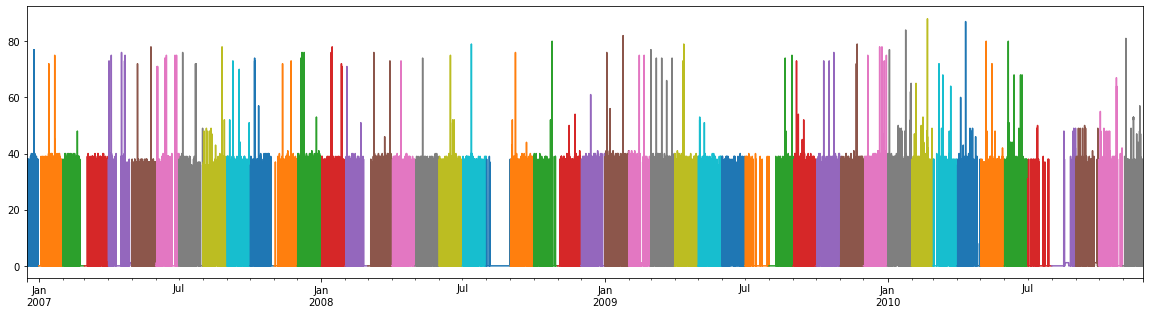

Sub_metering_2


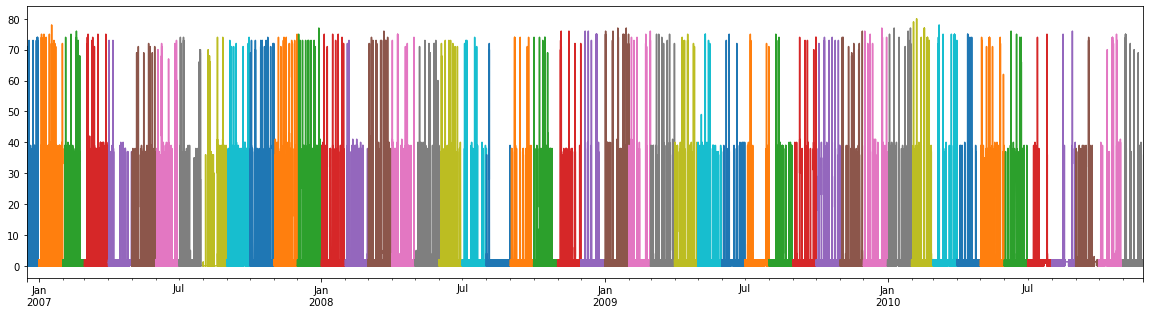

Sub_metering_3


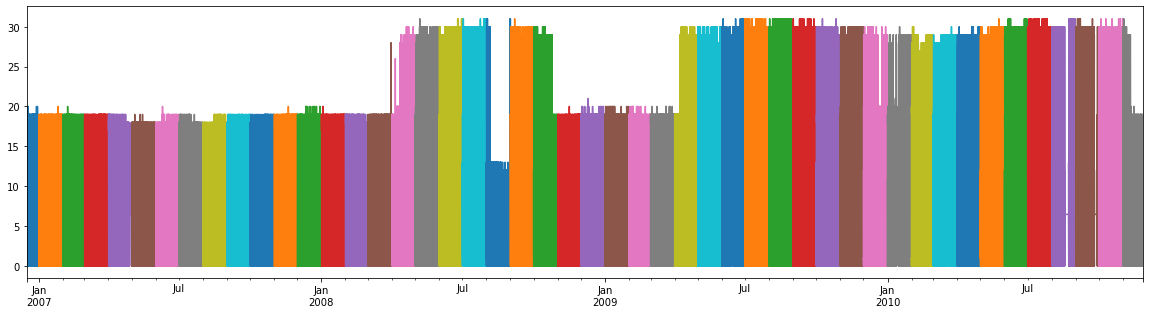

In [10]:
for col in df.columns:
    print(col)
    plt.figure(figsize = (20,5))
    df[col].resample('M').plot()
    plt.show()

### Inferences -

1. Global Active Power - 
i. The household consumed extremely less power in August 2008.
ii. The power usage is frequently more in the last days of the month.
2. Voltage - Voltage seems to be constant throughout.
3. Global Intensity - Since Global Active Power was less in August 2008, correspondingly Global Intensity is also less.
4. Sub Metering 3 - After April 2008, household seems to have consumed more and constant power through electric water heater and  AC, except August 2008 ofcourse.

### Data resample over month, day and hours for mean

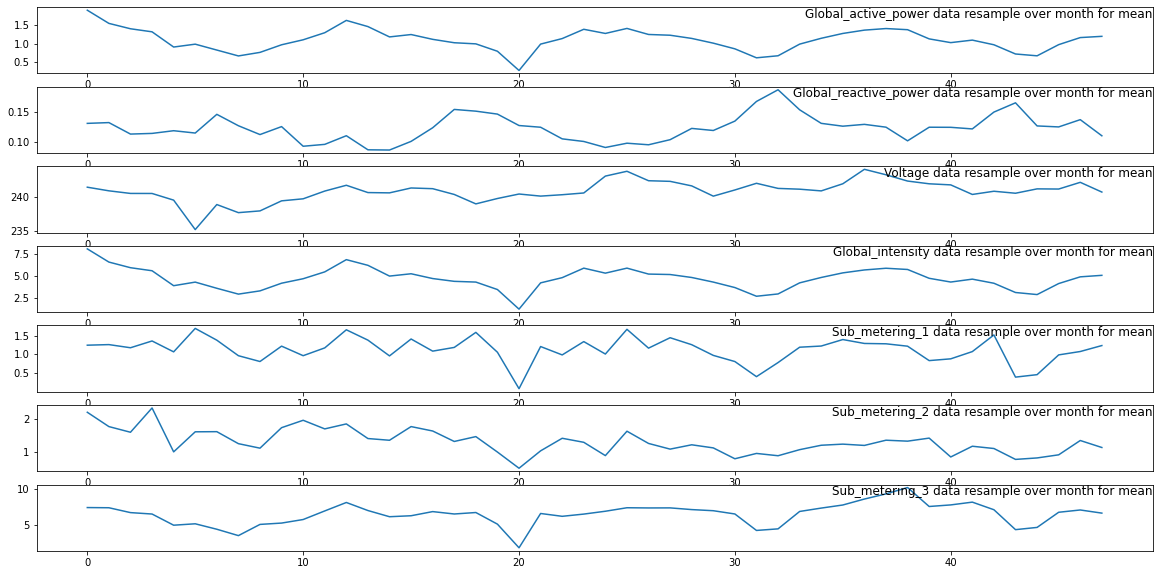

In [11]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('M').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over month for mean', y=0.75, loc='right')
    i += 1
plt.show()

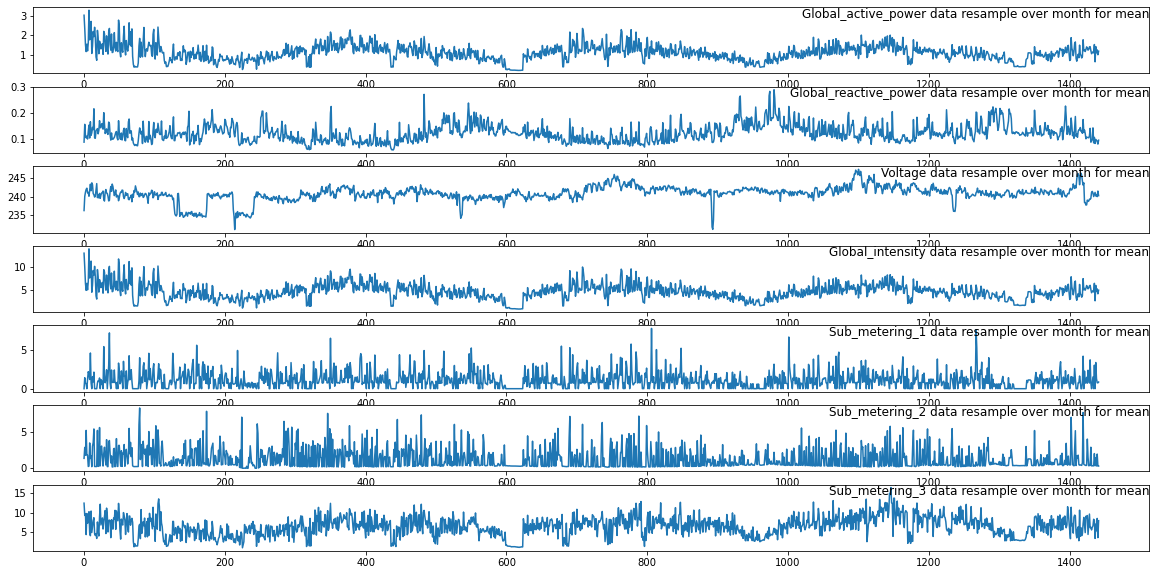

In [12]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over month for mean', y=0.75, loc='right')
    i += 1
plt.show()

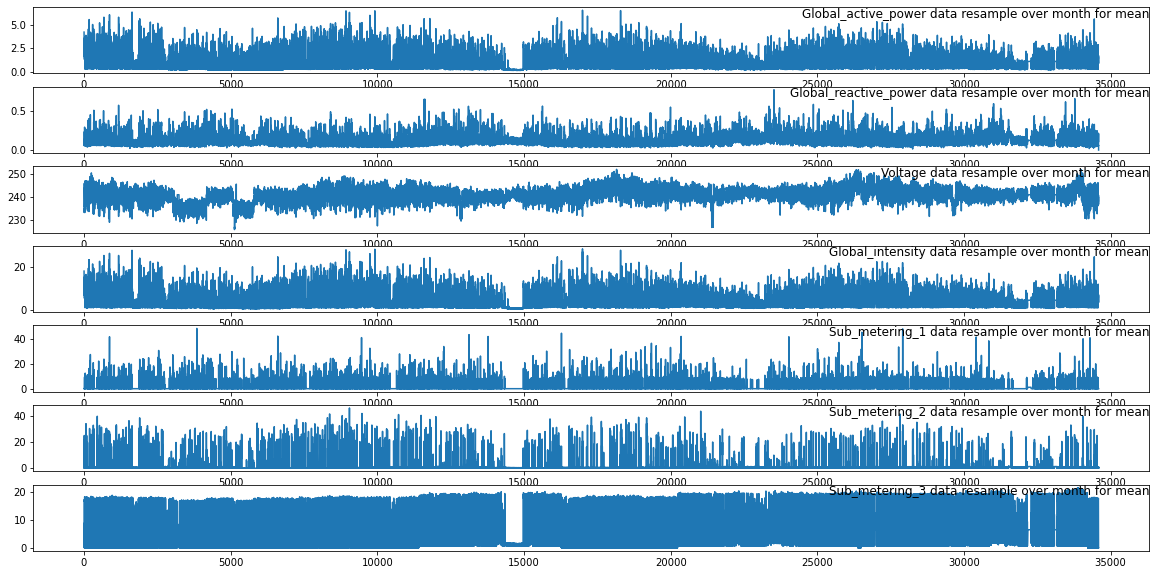

In [13]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('H').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over month for mean', y=0.75, loc='right')
    i += 1
plt.show()

### Inference - 
1. Changing the periodicity (month, day, hour, etc.) is important as it largely affects the interaction of data with a model, for eg. processes with resampling by month would be a lot faster than that of resampling by day.
2. Processing the original data, which is in minutes, can be very costly runtime wise so we could resample the data by hour when applying LSTM model.

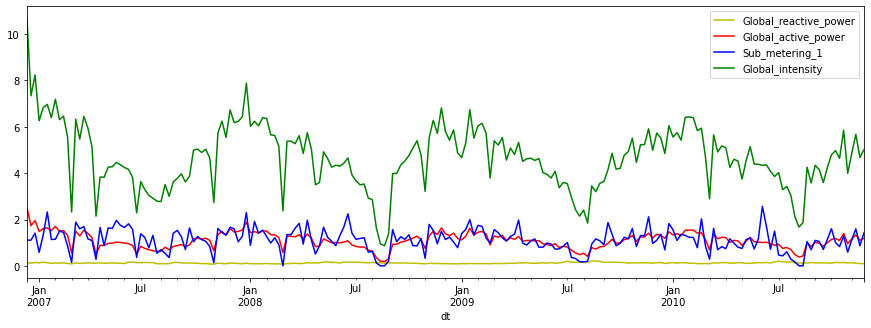

In [14]:
plt.figure(figsize=(15,5))
period = 'W'
df['Global_reactive_power'].resample(period).mean().plot(color='y', legend=True)
df['Global_active_power'].resample(period).mean().plot(color='r', legend=True)
df['Sub_metering_1'].resample(period).mean().plot(color='b', legend=True)
#df['Sub_metering_2'].resample(period).mean().plot(color='k', legend=True)
#df['Sub_metering_3'].resample(period).mean().plot(color='c', legend=True)
df['Global_intensity'].resample(period).mean().plot(color='g', legend=True)
plt.show()

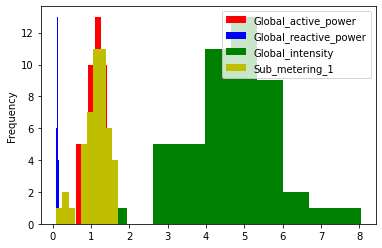

In [15]:
# hist plot of the mean of different feature resampled over month 
df['Global_active_power'].resample('M').mean().plot(kind='hist', color='r', legend=True )
df['Global_reactive_power'].resample('M').mean().plot(kind='hist',color='b', legend=True)
#df['Voltage'].resample('M').sum().plot(kind='hist',color='k', legend=True)
df['Global_intensity'].resample('M').mean().plot(kind='hist', color='g', legend=True)
df['Sub_metering_1'].resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

### The mean and sum of Global active power resampled over day have very similar structure.

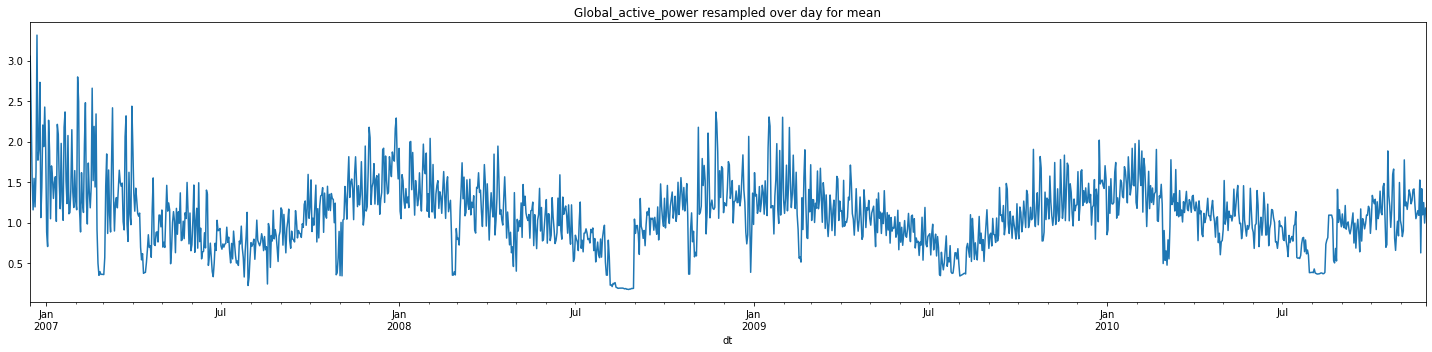

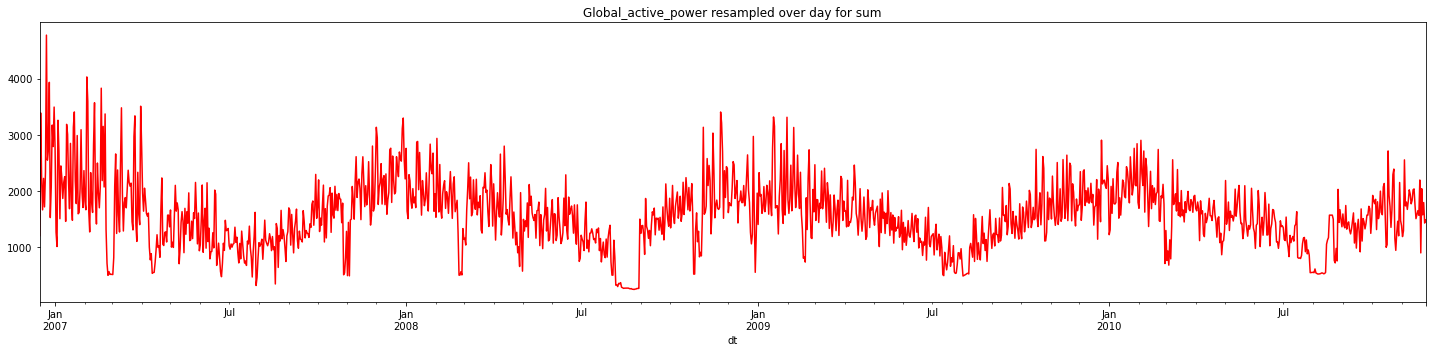

In [16]:
plt.figure(figsize = (20,5))
df['Global_active_power'].resample('D').mean().plot(title='Global_active_power resampled over day for mean') 
#df['Global_active_power'].resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

plt.figure(figsize = (20,5))
df['Global_active_power'].resample('D').sum().plot(title='Global_active_power resampled over day for sum', color='red') 
plt.tight_layout()
plt.show()

### How resampling over larger time intervals diminishes periodicity

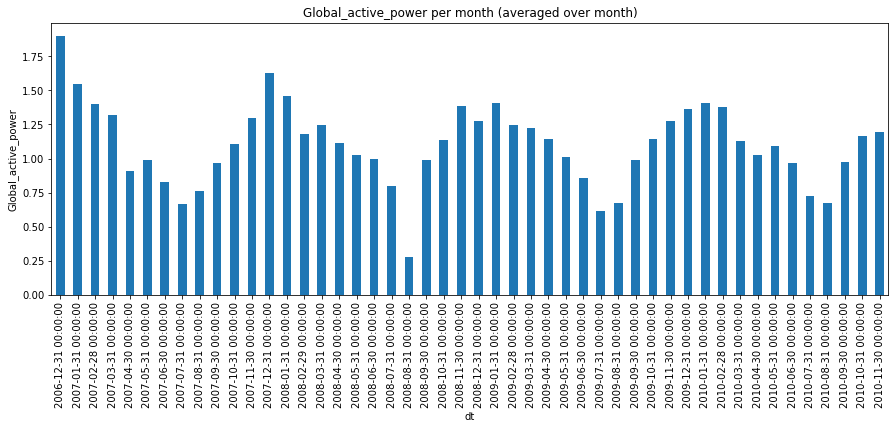

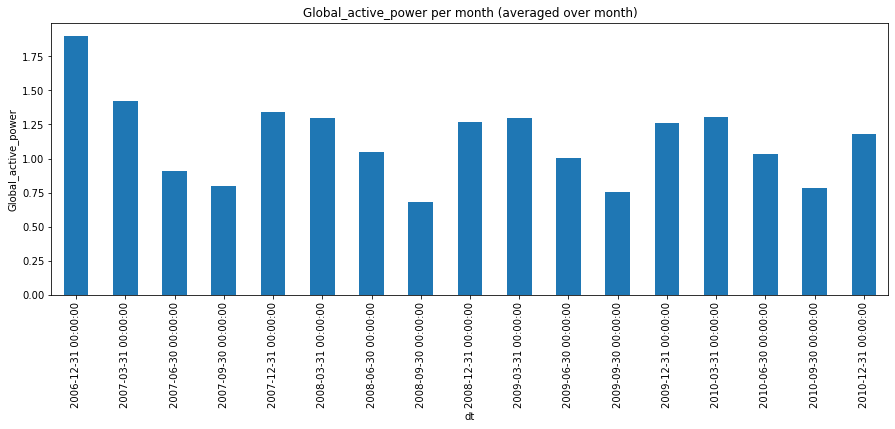

In [17]:
plt.figure(figsize=(15,5))
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()
plt.figure(figsize=(15,5))
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

### Voltage remains constant throughout the span of 4 years

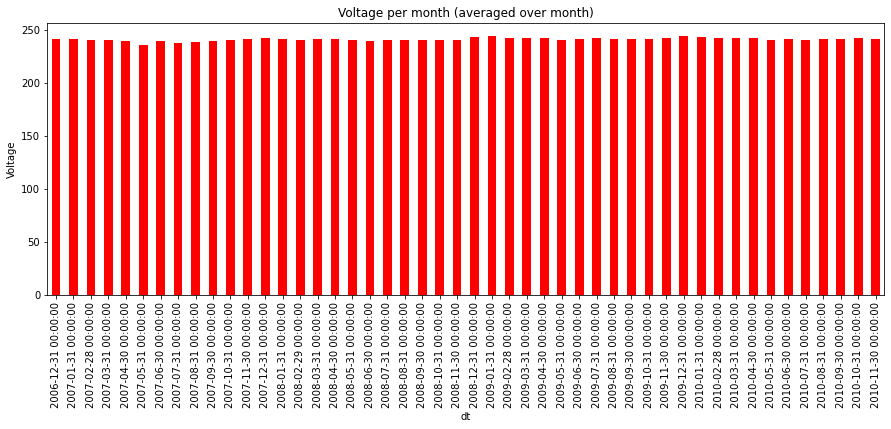

In [18]:
plt.figure(figsize = (15,5))
df['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=90)
plt.ylabel('Voltage')
plt.title('Voltage per month (averaged over month)')
plt.show()

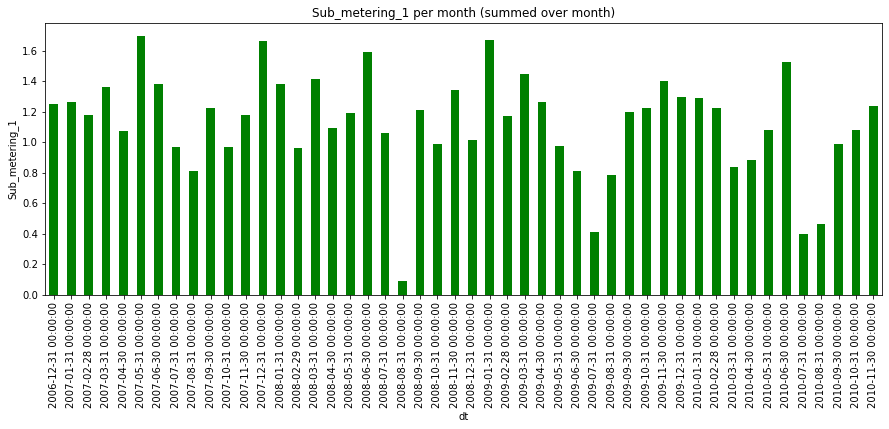

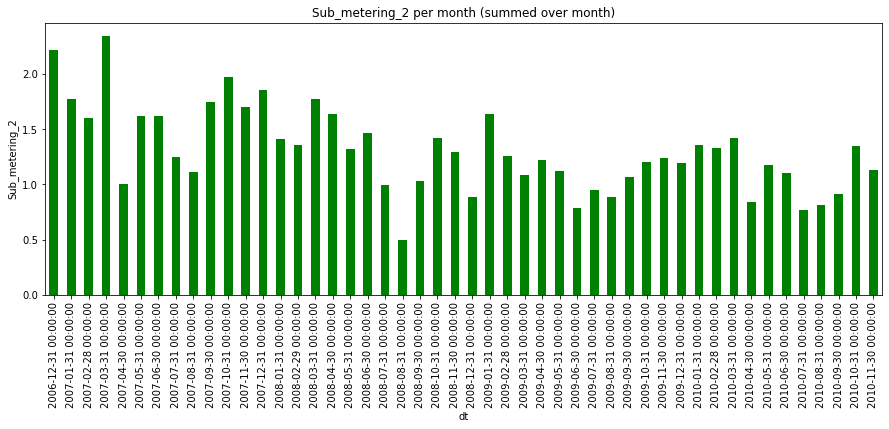

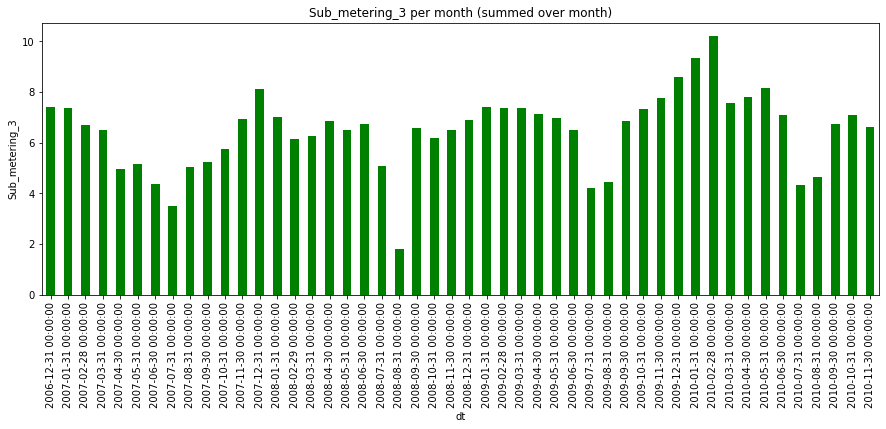

In [19]:
plt.figure(figsize = (15,5))
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='green')
plt.xticks(rotation=90)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per month (summed over month)')
plt.show()
plt.figure(figsize = (15,5))
df['Sub_metering_2'].resample('M').mean().plot(kind='bar', color='green')
plt.xticks(rotation=90)
plt.ylabel('Sub_metering_2')
plt.title('Sub_metering_2 per month (summed over month)')
plt.show()
plt.figure(figsize = (15,5))
df['Sub_metering_3'].resample('M').mean().plot(kind='bar', color='green')
plt.xticks(rotation=90)
plt.ylabel('Sub_metering_3')
plt.title('Sub_metering_3 per month (summed over month)')
plt.show()

### Correlation between variables

In [20]:
df.corr()  # by default this uses Pearson method

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399703,0.998889,0.484401,0.434569,0.638556
Global_reactive_power,0.247017,1.000000,-0.112233,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399703,-0.112233,1.000000,-0.411303,-0.195946,-0.167380,-0.268134
Global_intensity,0.998889,0.266120,-0.411303,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195946,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167380,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638556,0.089617,-0.268134,0.626543,0.102571,0.080872,1.000000


<AxesSubplot:>

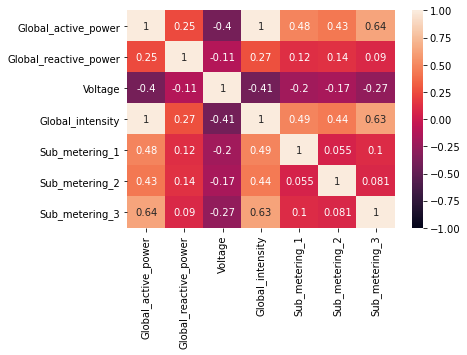

In [21]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

### Inferences - 
1. Global_intensity and Global_active_power are highly correlated.
2. Voltage and Global_active_power are less correlated.

In [22]:
data_returns = df.pct_change()  # percentage change 

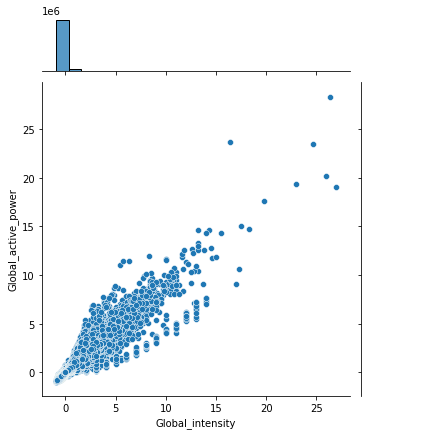

In [23]:
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  
plt.show()

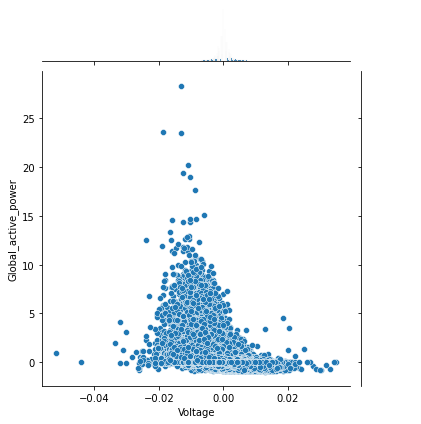

In [24]:
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

### Correlation between features with and without resampling using Spearman method

In [25]:
"""Spearman method is used when we have monotonoic data like this one, altho here it's not so monotonic so even if we had 
used Pearson it wouldn't have shown much difference, still using Spearman is always safe as it covers Pearson too"""
# Reference - https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8
#df.corr(method='spearman')

"Spearman method is used when we have monotonoic data like this one, altho here it's not so monotonic so even if we had \nused Pearson it wouldn't have shown much difference, still using Spearman is always safe as it covers Pearson too"

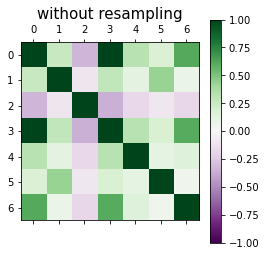

In [26]:
# Correlations among columns without resampling
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

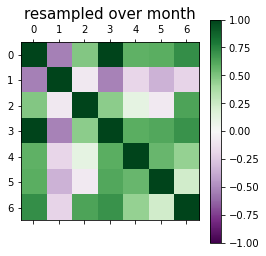

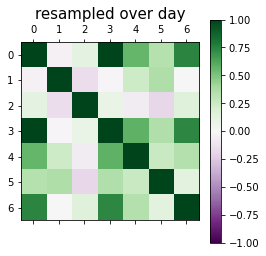

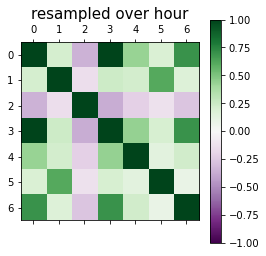

In [27]:
# Correlations of mean of features resampled over month and year
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('D').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over day', size=15)
plt.colorbar()
plt.show()
plt.matshow(df.resample('H').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over hour', size=15)
plt.colorbar()
plt.show()

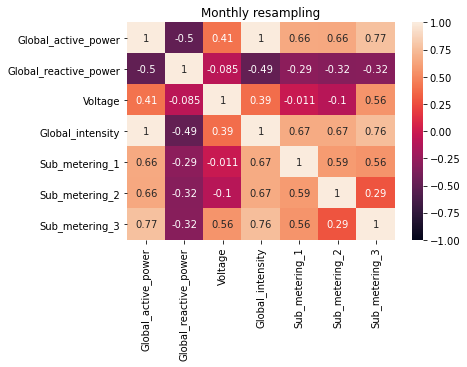

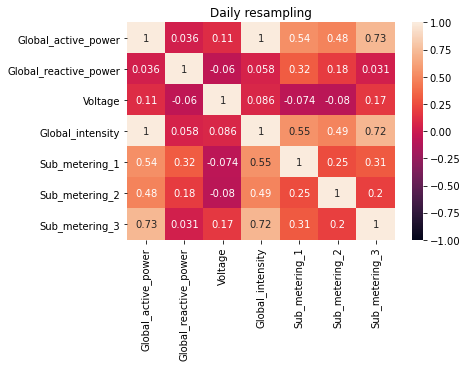

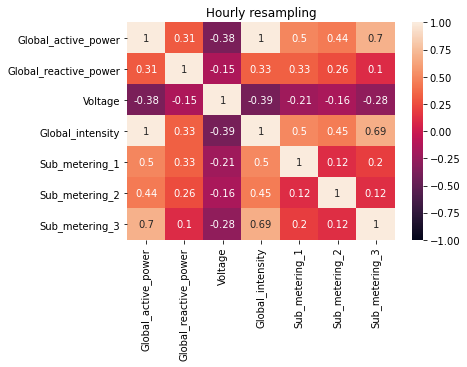

In [28]:
dfm = df.resample('M').mean()
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)
plt.show()
dfd = df.resample('D').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)
plt.show()
dfh = df.resample('H').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=12)
plt.show()

### Inference - From the above three correlation matrices we note that resampling over different time periods can change the correlation among features. 

## Forecasting
Ref - https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

### Preparing data

In [68]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [69]:
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [70]:
df_resample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.223167,0.229000,234.641667,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632167,0.080033,234.571667,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400300,0.085233,233.241667,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268617,0.075100,234.071667,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056717,0.076667,237.166667,13.046667,0.0,0.416667,17.216667


In order to reduce the computation time, and also get a quick result to test the model, we resample our data over hours to reduce the size of rows from 2075259 to 34589 (original data is given in minutes).

In [71]:
values = df_resample.values
#values[0]

In [72]:
# normalize features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [73]:
scaler

MinMaxScaler()

In [74]:
scaled[0]

array([0.63687753, 0.29573827, 0.33823529, 0.63115734, 0.        ,
       0.01136636, 0.78241815])

In [75]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [76]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
0,0.545055,0.103358,0.335550,0.541487,0.0,0.144652,0.782676,0.636878,0.295738,0.338235,0.631157,0.0,0.011366,0.782418
1,0.509031,0.110073,0.284527,0.502152,0.0,0.030869,0.774169,0.545055,0.103358,0.335550,0.541487,0.0,0.144652,0.782676
2,0.488571,0.096987,0.316368,0.481110,0.0,0.000000,0.778809,0.509031,0.110073,0.284527,0.502152,0.0,0.030869,0.774169
3,0.455649,0.099010,0.435102,0.449904,0.0,0.008973,0.798917,0.488571,0.096987,0.316368,0.481110,0.0,0.000000,0.778809
4,0.322569,0.072536,0.495972,0.323529,0.0,0.002872,0.205723,0.455649,0.099010,0.435102,0.449904,0.0,0.008973,0.798917


In [77]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
0,0.545055,0.103358,0.335550,0.541487,0.0,0.144652,0.782676,0.636878
1,0.509031,0.110073,0.284527,0.502152,0.0,0.030869,0.774169,0.545055
2,0.488571,0.096987,0.316368,0.481110,0.0,0.000000,0.778809,0.509031
3,0.455649,0.099010,0.435102,0.449904,0.0,0.008973,0.798917,0.488571
4,0.322569,0.072536,0.495972,0.323529,0.0,0.002872,0.205723,0.455649


Here, we have converted our data such that Global Active Power acts as output variable (var1) and others act as input variable.

### Data spliting into train and test data

To speed up process, we train 1 year of data and predict next 3 years of data.

In [78]:
values = reframed.values

In [79]:
n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]

In [80]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [81]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((8760, 7), (8760,), (25828, 7), (25828,))

In [82]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [83]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((8760, 1, 7), (8760,), (25828, 1, 7), (25828,))

### LSTM model

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score

In [85]:
#train_X

In [86]:
train_X.shape

(8760, 1, 7)

In [87]:
# Ref - https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc
train_X.shape[1], train_X.shape[2]

(1, 7)

We only need this as our input_shape for the first layer of LSTM model, because regardless of however many records we have, they all will have this (1,7) shape.

### LSTM Model Architecture

1. 100 neurons in the first layer
2. Dropout = 20%
3. 1 neuron in the output layer for predicting Global_active_power
4. The input shape will be 1 time step with 7 features
5. Used Mean Absolute Error (MAE) loss function and the efficient Adam version of Stochastic Gradient Descent
6. The model will be fit for 20 training epochs with a batch size of 70

In [88]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               43200     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________


In [90]:
"""Ref - https://stackoverflow.com/questions/46308374/what-is-validation-data-used-for-in-a-keras-sequential-model
    - https://stackoverflow.com/questions/57314583/keras-lstm-batch-size-and-model-fit
    - https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network
    - https://stackoverflow.com/questions/47299624/how-to-understand-loss-acc-val-loss-val-acc-in-keras-model-fitting"""

# fitting the network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
126/126 - 2s - loss: 0.0190 - val_loss: 0.0119 - 2s/epoch - 15ms/step
Epoch 2/20
126/126 - 0s - loss: 0.0122 - val_loss: 0.0108 - 430ms/epoch - 3ms/step
Epoch 3/20
126/126 - 0s - loss: 0.0117 - val_loss: 0.0101 - 441ms/epoch - 4ms/step
Epoch 4/20
126/126 - 0s - loss: 0.0113 - val_loss: 0.0099 - 418ms/epoch - 3ms/step
Epoch 5/20
126/126 - 0s - loss: 0.0112 - val_loss: 0.0097 - 435ms/epoch - 3ms/step
Epoch 6/20
126/126 - 0s - loss: 0.0110 - val_loss: 0.0095 - 450ms/epoch - 4ms/step
Epoch 7/20
126/126 - 0s - loss: 0.0110 - val_loss: 0.0096 - 433ms/epoch - 3ms/step
Epoch 8/20
126/126 - 0s - loss: 0.0110 - val_loss: 0.0096 - 440ms/epoch - 3ms/step
Epoch 9/20
126/126 - 0s - loss: 0.0109 - val_loss: 0.0095 - 424ms/epoch - 3ms/step
Epoch 10/20
126/126 - 0s - loss: 0.0108 - val_loss: 0.0095 - 477ms/epoch - 4ms/step
Epoch 11/20
126/126 - 0s - loss: 0.0108 - val_loss: 0.0097 - 427ms/epoch - 3ms/step
Epoch 12/20
126/126 - 0s - loss: 0.0108 - val_loss: 0.0097 - 430ms/epoch - 3ms/step
Epo

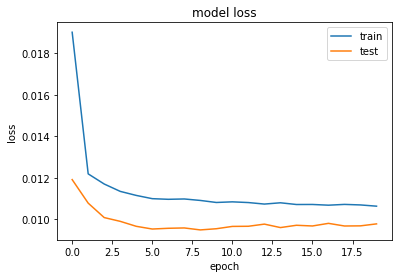

In [91]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [92]:
# Prediction of test set and inverse scaling
# Ref - https://stackoverflow.com/questions/57216718/how-to-inverse-transform-the-predicted-values-in-a-multivariate-time-series-lstm

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))   # 7 = test_X.shape[2] (we can replace but will have to run file again so for now directly wrote 7), basically we are shaping our test_X back from 3d (25828,1,7) to 2d (25828,7)
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)   # Instead of test_X[:, -6:], we can also do test_X[:, 1:]
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.636


Basically we are converting our actual and predicted test_y values back to their original form, hence we do inverse_transform, fit_transform's opposite

Model maybe improved by adjusting epochs and batch_size.

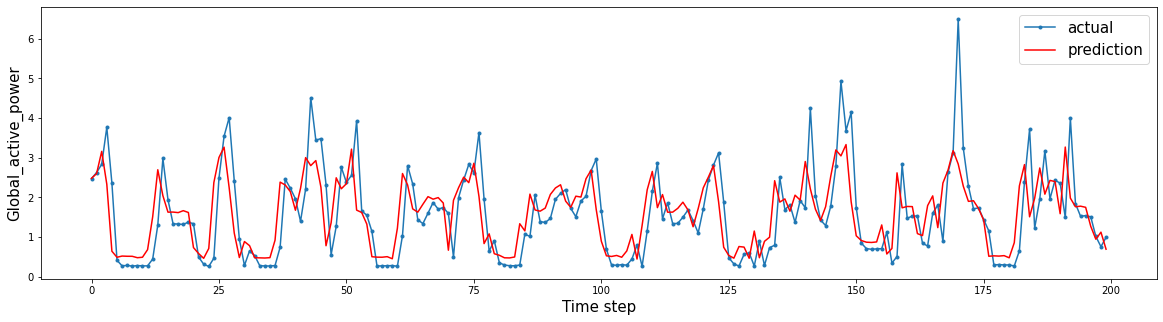

In [34]:
# Predictions for the first 200 hours
aa=[x for x in range(200)]
plt.figure(figsize=(20,5))
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

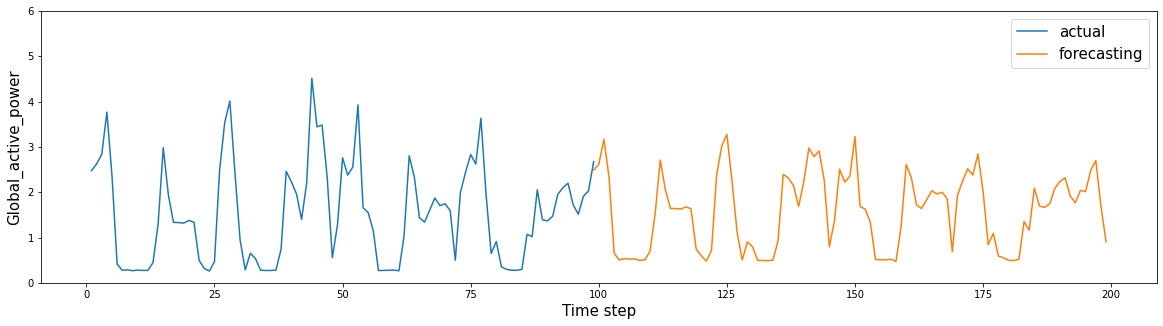

In [154]:
plt.figure(figsize=(20,5))
plt.ylim([0,6])   # ylim set upto 6 just to compare with the above graph
plt.plot(np.arange(1,100), inv_y[:99], label="actual")
plt.plot(np.arange(99,200), inv_yhat[:101], label="forecasting")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [94]:
inv_y

array([2.47501667, 2.6266    , 2.83416667, ..., 1.57346667, 1.65936667,
       1.1637    ])

In [96]:
inv_yhat

array([2.49008106, 2.61484056, 3.16885289, ..., 1.67820055, 1.29825142,
       1.06495534])

In [43]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
0,0.545055,0.103358,0.335550,0.541487,0.0,0.144652,0.782676,0.636878
1,0.509031,0.110073,0.284527,0.502152,0.0,0.030869,0.774169,0.545055
2,0.488571,0.096987,0.316369,0.481110,0.0,0.000000,0.778809,0.509031
3,0.455649,0.099010,0.435102,0.449904,0.0,0.008973,0.798917,0.488571
4,0.322569,0.072536,0.495972,0.323529,0.0,0.002872,0.205723,0.455649


In [62]:
test_X[0]

array([0.38882285, 0.05484287, 0.45358086, 0.37625542, 0.        ,
       0.        , 0.80433106], dtype=float32)

In [61]:
test_X[:, -6:][0]

array([0.05484287, 0.45358086, 0.37625542, 0.        , 0.        ,
       0.80433106], dtype=float32)

In [63]:
yhat[0]

array([0.36620486], dtype=float32)

In [60]:
np.concatenate((yhat, test_X[:, -6:]), axis=1)[0]

array([0.36620486, 0.05484287, 0.45358086, 0.37625542, 0.        ,
       0.        , 0.80433106], dtype=float32)

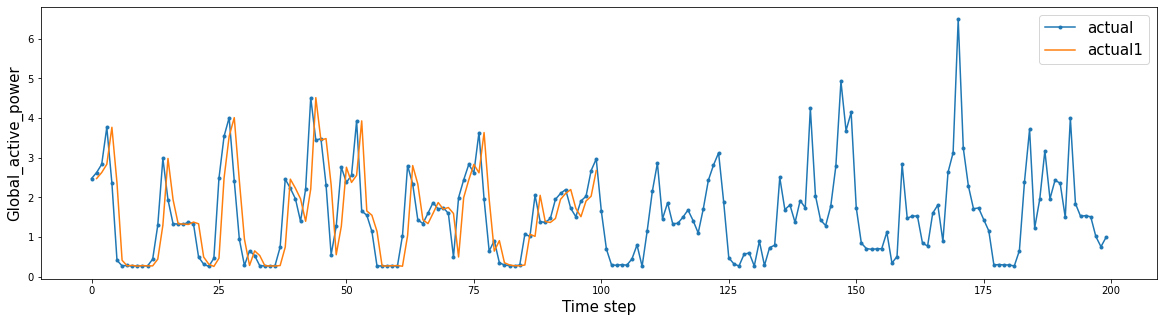

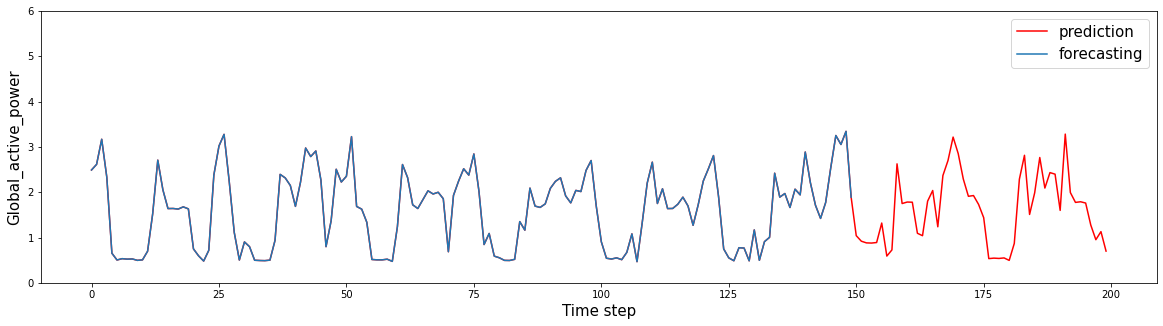

In [147]:
aa=[x for x in range(200)]
plt.figure(figsize=(20,5))
plt.plot(aa, inv_y[:200], marker='.', label="actual")
#plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.plot(np.arange(1,100), inv_y[:99], label="actual1")
#plt.plot(np.arange(100,200), inv_yhat[:100], label="forecasting")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

aa=[x for x in range(200)]
plt.figure(figsize=(20,5))
plt.ylim([0,6])
#plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
#plt.plot(np.arange(1,100), inv_y[:99], label="actual1")
plt.plot(np.arange(0,150), inv_yhat[:150], label="forecasting")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()